In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import pprint as pprint

import datetime



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [43]:
#Display the data frame with city names
df_cities= pd.DataFrame({"City": cities})

df_cities

,City
0,mataura
1,businga
2,jamestown
3,hilo
4,sitka
...,...
614,sayat
615,mutoko
616,muros
617,half moon bay


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
#Initialize empty list to store weather data received from weather api for each of the cities above
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [45]:
#Initialize counter for print log sets of 50 cities
record_counter = 0
set_counter = 1

# URL for API Call and api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key 

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    #API request for the above series of cities
    query_url = url + "&q=" + city
    # Convert to json
    response = requests.get(query_url).json()
    
    if record_counter < 50:
        record_counter += 1
        
    else:
        set_counter += 1
        record_counter = 1
    
    #Include a print log of each city as it's being processed (with the city number and city name and the complete url)
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city.capitalize()))
    print(query_url)
    
    
    #try-except block for error free execution when city not found
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=mataura
Processing record 2 of set 1 | Businga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=businga
Processing record 3 of set 1 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=jamestown
Processing record 4 of set 1 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=hilo
Processing record 5 of set 1 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=sitka
Processing record 6 of set 1 | Kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kununurra
Processing record 7 of set 1 | Atuona
http://api.ope

Processing record 5 of set 2 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=hithadhoo
Processing record 6 of set 2 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=qaqortoq
Processing record 7 of set 2 | Saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=saint-philippe
Processing record 8 of set 2 | Tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=tiznit
Processing record 9 of set 2 | Amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=amderma
City not found!
Processing record 10 of set 2 | Cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=cabo san lucas
Processing record 11 of set 2 | Hobart
http://api.o

Processing record 9 of set 3 | Brumado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=brumado
Processing record 10 of set 3 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=ancud
Processing record 11 of set 3 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=taolanaro
City not found!
Processing record 12 of set 3 | Krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=krasnoselkup
City not found!
Processing record 13 of set 3 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=nikolskoye
Processing record 14 of set 3 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kieta
Processing record 15 of set 3 | Auki
http://api.ope

Processing record 12 of set 4 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=chuy
Processing record 13 of set 4 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bilibino
Processing record 14 of set 4 | Umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=umzimvubu
City not found!
Processing record 15 of set 4 | Tashara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=tashara
Processing record 16 of set 4 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=narsaq
Processing record 17 of set 4 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kudahuvadhoo
Processing record 18 of set 4 | Kautokeino
http://api.openweathermap.o

Processing record 16 of set 5 | Boyany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=boyany
Processing record 17 of set 5 | Mentok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=mentok
City not found!
Processing record 18 of set 5 | Hurricane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=hurricane
Processing record 19 of set 5 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=thompson
Processing record 20 of set 5 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=rawson
Processing record 21 of set 5 | Martvili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=martvili
Processing record 22 of set 5 | Arkhara
http://api.openweathermap.org/data/2

Processing record 21 of set 6 | Bama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bama
Processing record 22 of set 6 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=lorengau
Processing record 23 of set 6 | Grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=grand river south east
City not found!
Processing record 24 of set 6 | Povoa de varzim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=povoa de varzim
Processing record 25 of set 6 | Calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=calama
Processing record 26 of set 6 | Torit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=torit
City not found!
Processing record 27 of se

Processing record 25 of set 7 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=mahon
Processing record 26 of set 7 | Umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=umm durman
City not found!
Processing record 27 of set 7 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=buchanan
Processing record 28 of set 7 | Arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=arman
Processing record 29 of set 7 | Otradnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=otradnoye
Processing record 30 of set 7 | Aguililla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=aguililla
Processing record 31 of set 7 | Havre-saint-pierre
http://api.openweat

Processing record 29 of set 8 | Kviteseid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kviteseid
Processing record 30 of set 8 | Narodychi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=narodychi
Processing record 31 of set 8 | Terrak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=terrak
Processing record 32 of set 8 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=lata
Processing record 33 of set 8 | Bara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bara
Processing record 34 of set 8 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=souillac
Processing record 35 of set 8 | Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing record 32 of set 9 | Teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=teguldet
Processing record 33 of set 9 | Bitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bitung
Processing record 34 of set 9 | Fort wellington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=fort wellington
Processing record 35 of set 9 | Akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=akdepe
Processing record 36 of set 9 | Mangai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=mangai
Processing record 37 of set 9 | Garden acres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=garden acres
Processing record 38 of set 9 | Tabiauea
http://api.openweathermap.org/d

Processing record 36 of set 10 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=dingle
Processing record 37 of set 10 | Soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=soyo
Processing record 38 of set 10 | Balkhash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=balkhash
Processing record 39 of set 10 | Yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=yining
Processing record 40 of set 10 | Kalangala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kalangala
Processing record 41 of set 10 | Heerenveen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=heerenveen
Processing record 42 of set 10 | Troy
http://api.openweathermap.org/data/2.5/weather?u

Processing record 40 of set 11 | Kaili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kaili
Processing record 41 of set 11 | Nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=nalut
Processing record 42 of set 11 | Uwayl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=uwayl
City not found!
Processing record 43 of set 11 | Bagdarin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bagdarin
Processing record 44 of set 11 | Machali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=machali
City not found!
Processing record 45 of set 11 | Kapuskasing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kapuskasing
Processing record 46 of set 11 | Chumikan
http://api.openw

Processing record 44 of set 12 | Rapar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=rapar
Processing record 45 of set 12 | Neyshabur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=neyshabur
Processing record 46 of set 12 | Pedregulho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=pedregulho
Processing record 47 of set 12 | Ipixuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=ipixuna
Processing record 48 of set 12 | Huanren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=huanren
Processing record 49 of set 12 | Ust-maya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=ust-maya
Processing record 50 of set 12 | Florin
http://api.openweathermap.org/data/2.5/w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,mataura,100,NZ,1573347853,91,51.01,-46.19,168.86,4.00
1,businga,77,CD,1573347927,97,69.60,3.34,20.89,0.60
2,jamestown,0,AU,1573347927,31,65.59,-33.21,138.60,3.96
3,hilo,1,US,1573347927,58,87.80,19.71,-155.08,11.41
4,sitka,0,US,1573347928,31,64.47,37.17,-99.65,10.58


In [57]:
weather_data["Date"]=pd.to_datetime(weather_data["Date"], unit='s')
weather_data["City"]= weather_data["City"].str.capitalize()


weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
City          547 non-null object
Cloudiness    547 non-null int64
Country       547 non-null object
Date          547 non-null datetime64[ns]
Humidity      547 non-null int64
Temp          547 non-null float64
Lat           547 non-null float64
Lng           547 non-null float64
Wind Speed    547 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 38.6+ KB


In [68]:
# Export the city data into a .csv file
weather_data.to_csv(output_data_file)

#Display dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,Mataura,100,NZ,2019-11-10 01:04:13,91,51.01,-46.19,168.86,4.00
1,Businga,77,CD,2019-11-10 01:05:27,97,69.60,3.34,20.89,0.60
2,Jamestown,0,AU,2019-11-10 01:05:27,31,65.59,-33.21,138.60,3.96
3,Hilo,1,US,2019-11-10 01:05:27,58,87.80,19.71,-155.08,11.41
4,Sitka,0,US,2019-11-10 01:05:28,31,64.47,37.17,-99.65,10.58


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

9 11 2019


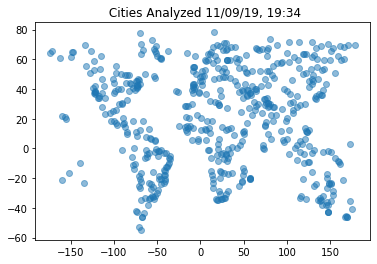

<Figure size 432x288 with 0 Axes>

In [67]:
#Checking global distribution of cities
#If distribution is not good regeneraterandom cities for avoiding data bias due to limited geographical spead of cities
plt.scatter(weather_data['Lng'], weather_data['Lat'], alpha = 0.5)

date_time = datetime.datetime.now()

plt.title(" Cities Analyzed {}".format(date_time.strftime("%x, %H:%M")))
plt.show()

plt.savefig("Map.png")

Latitude vs. Temperature Plot


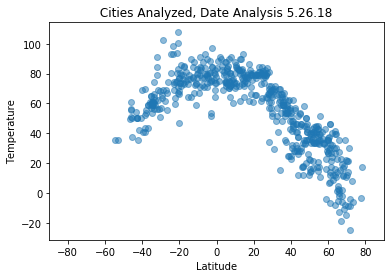

In [39]:
plt.scatter(weather_data['Lat'], weather_data['Temp'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(-90,90)
plt.show()


Latitude vs. Humidity Plot

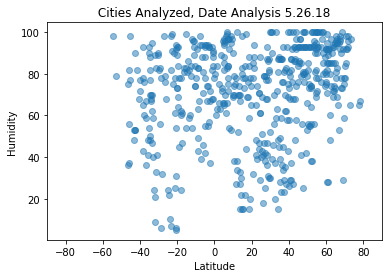

In [40]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-90,90)
plt.show()

#### Latitude vs. Cloudiness Plot

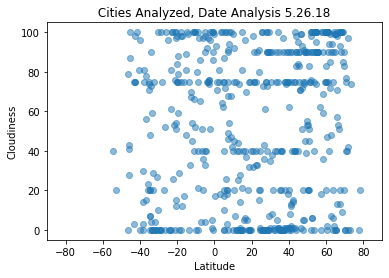

In [41]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-90,90)
plt.show()

#### Latitude vs. Wind Speed Plot

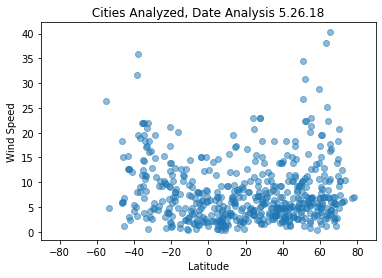

In [42]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], alpha = 0.5)
plt.title(" Cities Analyzed, Date Analysis 5.26.18 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-90,90)
plt.show()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


#### Latitude vs. Temperature Plot

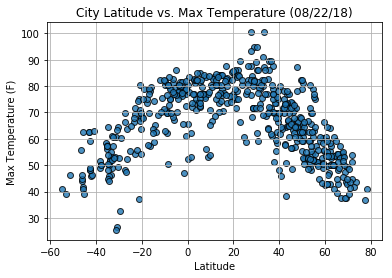

#### Latitude vs. Humidity Plot

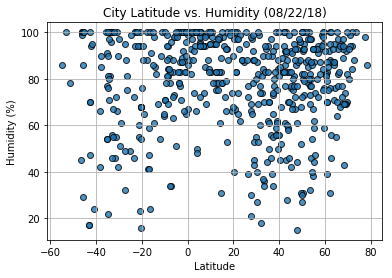

#### Latitude vs. Cloudiness Plot

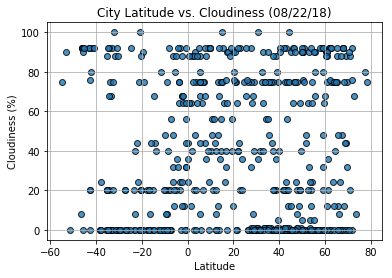

#### Latitude vs. Wind Speed Plot

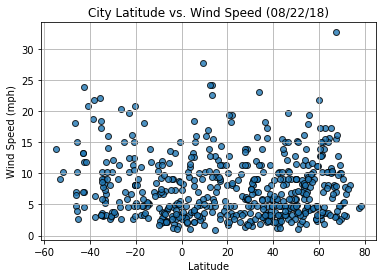